In [1]:
import pandas as pd
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,...,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,...,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,...,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,...,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,...,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,...,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,...,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,...,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


## What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [4]:
(wego["ADJUSTED_ONTIME_COUNT"].sum()/350329)*100

77.08411236295025

In [5]:
ad_ad = wego["ADHERENCE"].std()

In [6]:
ad_dev = wego["HDWY_DEV"].std()

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

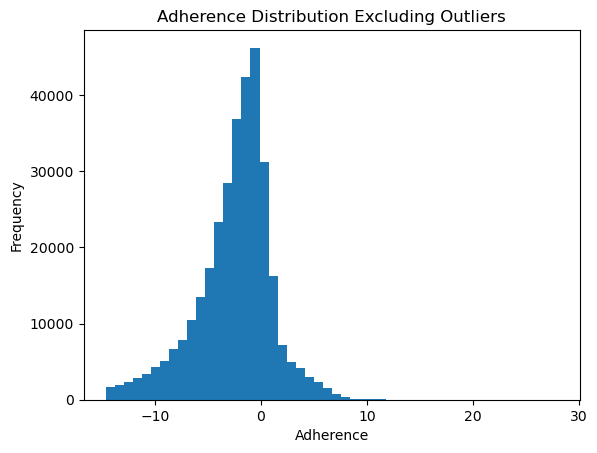

In [7]:
ax = (
    wego[wego['ADHERENCE'].between(ad_ad - ad_dev*3,
                                   ad_ad + ad_dev*3,
                                   inclusive='both')]
    ['ADHERENCE']
    .plot(kind='hist',
          bins=50)
)
ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel='Adherence'
    )

In [8]:
direction = wego['ROUTE_DIRECTION_NAME'].value_counts().sort_index()

In [9]:
dir_headway = wego[["ROUTE_DIRECTION_NAME","HDWY_DEV", "ADHERENCE"]].groupby('ROUTE_DIRECTION_NAME').mean('HDWY_DEV', 'ADHERENCE')

In [10]:
dir_headway

,HDWY_DEV,ADHERENCE
ROUTE_DIRECTION_NAME,,
FROM DOWNTOWN,0.579990,-3.960287
TO DOWNTOWN,0.447773,-2.321804


In [11]:
route_headway = wego[["ROUTE_ABBR","HDWY_DEV", "ADHERENCE"]].groupby('ROUTE_ABBR').mean('HDWY_DEV', 'ADHERENCE')

In [12]:
route_headway

,HDWY_DEV,ADHERENCE
ROUTE_ABBR,,
3,0.580907,-3.761491
7,0.336808,-3.346555
22,0.955867,-1.138107
23,1.053563,-1.760110
50,0.212376,-2.505022
52,0.974776,-3.971342
55,0.261038,-4.823302
56,0.149213,-2.703988


In [18]:
routedir_headway = wego[["ROUTE_DIRECTION_NAME", "ROUTE_ABBR", "HDWY_DEV", "ADHERENCE"]].groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).mean("HDWY_DEV", "ADHERENCE")

In [21]:
routedir_headway = routedir_headway.reset_index()

In [22]:
routedir_headway.columns

Index(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'ADHERENCE'], dtype='object')

In [15]:
##routedir_headway['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME'] = routedir_headway.index
##routedir_headway

HDWY_DEV  ADHERENCE  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                        
3          FROM DOWNTOWN         0.636069  -4.831550   
           TO DOWNTOWN           0.525802  -2.689360   
7          FROM DOWNTOWN         0.379082  -4.028927   
           TO DOWNTOWN           0.293108  -2.599183   
22         FROM DOWNTOWN         1.088609  -2.179503   
           TO DOWNTOWN           0.808517  -0.041538   
23         FROM DOWNTOWN         1.063912  -2.295042   
           TO DOWNTOWN           1.038711  -0.959462   
50         FROM DOWNTOWN         0.222529  -2.729163   
           TO DOWNTOWN           0.202238  -2.282192   
52         FROM DOWNTOWN         1.238860  -5.149382   
           TO DOWNTOWN           0.690182  -2.723518   
55         FROM DOWNTOWN         0.264152  -5.673887   
           TO DOWNTOWN           0.257969  -3.989490   
56         FROM DOWNTOWN         0.158441  -3.579404   
           TO DOWNTOWN           0.135393  -1.484165   

                                (ROUTE_ABBR, ROUTE_DIRECTION_NAME)  
ROUTE_ABBR ROUTE_DIRECTION_NAME                                     
3          FROM DOWNTOWN                        (3, FROM DOWNTOWN)  
           TO DOWNTOWN                            (3, TO DOWNTOWN)  
7          FROM DOWNTOWN                        (7, FROM DOWNTOWN)  
           TO DOWNTOWN                            (7, TO DOWNTOWN)  
22         FROM DOWNTOWN                       (22, FROM DOWNTOWN)  
           TO DOWNTOWN                           (22, TO DOWNTOWN)  
23         FROM DOWNTOWN                       (23, FROM DOWNTOWN)  
           TO DOWNTOWN                           (23, TO DOWNTOWN)  
50         FROM DOWNTOWN                       (50, FROM DOWNTOWN)  
           TO DOWNTOWN                           (50, TO DOWNTOWN)  
52         FROM DOWNTOWN                       (52, FROM DOWNTOWN)  
           TO DOWNTOWN                           (52, TO DOWNTOWN)  
55         FROM DOWNTOWN                       (55, FROM DOWNTOWN)  
           TO DOWNTOWN                           (55, TO DOWNTOWN)  
56         FROM DOWNTOWN                       (56, FROM DOWNTOWN)  
           TO DOWNTOWN                           (56, TO DOWNTOWN)

[Text(0, 0, '3'),
 Text(1, 0, '7'),
 Text(2, 0, '22'),
 Text(3, 0, '23'),
 Text(4, 0, '50'),
 Text(5, 0, '52'),
 Text(6, 0, '55'),
 Text(7, 0, '56')]

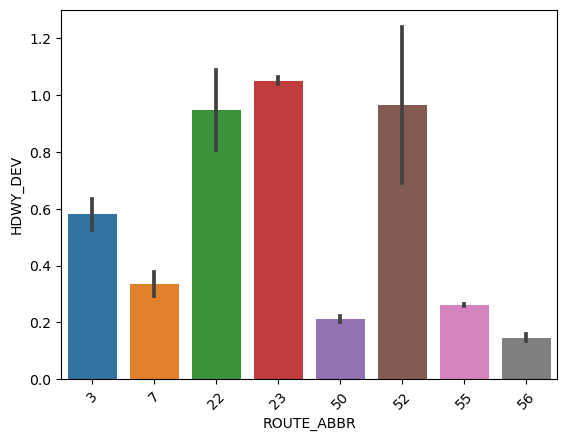

In [23]:
routeplot = sns.barplot(x="ROUTE_ABBR", y="HDWY_DEV",
           data=routedir_headway)
#rotate labels
routeplot.set_xticklabels(routeplot.get_xticklabels(), rotation=45)

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


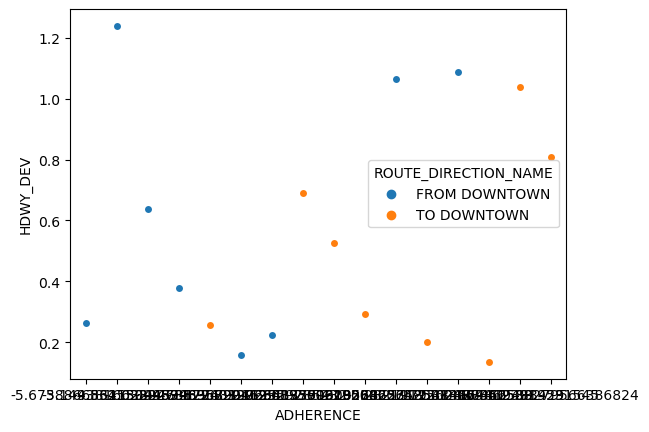

In [26]:
route_dots = sns.stripplot(data=routedir_headway, x="ADHERENCE", y="HDWY_DEV", hue="ROUTE_DIRECTION_NAME")